1) Obtener los 3 canales RGB de una imágen, indicando cómo es la matriz en cada caso.
2) Intercambiar los canales de una imágen (R-->G, G-->B, B-->R)
3) Convertir una imagen RGB a YIQ
    a) Modificar los canales YIQ.
    b) Volver a convertir la imagen a RGB.

In [1]:
import imageio      #Para leer y guardar imagenes.
import numpy as np  #Operaciones con vectores, matrices, tensores...
import matplotlib.pyplot as plt    #Para realizar graficos.

#Para realizar los graficos en la misma linea de codigo.
%matplotlib inline 

In [2]:
#Función para operaciones con matrices.
def apply_matrix(img, M):
        return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

### EJERCICIO 1

(1350, 1080, 3)
Matriz capa 1:
 [[0.57254902 0.61176471 0.57254902 ... 0.29803922 0.28627451 0.24313725]
 [0.53333333 0.58039216 0.56078431 ... 0.31764706 0.30588235 0.28627451]
 [0.56078431 0.59607843 0.58039216 ... 0.33333333 0.3254902  0.34117647]
 ...
 [0.30196078 0.02352941 0.07843137 ... 0.79607843 0.7372549  0.62352941]
 [0.27058824 0.36078431 0.49803922 ... 0.79215686 0.60784314 0.71764706]
 [0.20392157 0.39607843 0.65490196 ... 0.90588235 0.67843137 0.69411765]]


Matriz capa 2:
 [[0.58823529 0.62745098 0.58823529 ... 0.35686275 0.34117647 0.29019608]
 [0.54901961 0.59607843 0.57647059 ... 0.37647059 0.36078431 0.33333333]
 [0.57647059 0.61176471 0.59607843 ... 0.39215686 0.38039216 0.38431373]
 ...
 [0.40784314 0.12941176 0.18431373 ... 0.81176471 0.75294118 0.63921569]
 [0.37647059 0.46666667 0.60392157 ... 0.80784314 0.62352941 0.73333333]
 [0.30980392 0.50196078 0.76078431 ... 0.92156863 0.69411765 0.70980392]]


Matriz capa 3:
 [[0.6        0.63921569 0.6        ... 0.368

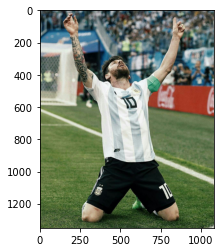

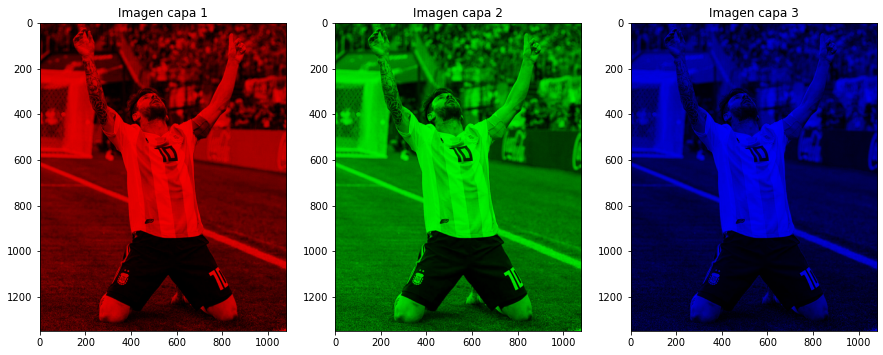

In [3]:
#Cargo una imagen
img_rgb = imageio.imread('messi.jpg')/255
#Mostrar imagen
plt.imshow(img_rgb)

print(img_rgb.shape) #Tamaño de la imagen y capas

#Matrices para cada capa
M = np.array([[1,0,0],[0,0,0],[0,0,0]])
N = np.array([[0,0,0],[0,1,0],[0,0,0]])
L = np.array([[0,0,0],[0,0,0],[0,0,1]])

fig, axes = plt.subplots(1,3,figsize=(15,8))
img_red = apply_matrix(img_rgb, M)
axes[0].set_title('Imagen capa 1')
axes[0].imshow(img_red)
img_green = apply_matrix(img_rgb, N)
axes[1].set_title('Imagen capa 2')
axes[1].imshow(img_green)
img_blue = apply_matrix(img_rgb, L)
axes[2].set_title('Imagen capa 3')
axes[2].imshow(img_blue)
print("Matriz capa 1:\n",img_rgb[:,:,0])
print("\n")
print("Matriz capa 2:\n",img_rgb[:,:,1])
print("\n")
print("Matriz capa 3:\n",img_rgb[:,:,2])

### EJERCICIO 2

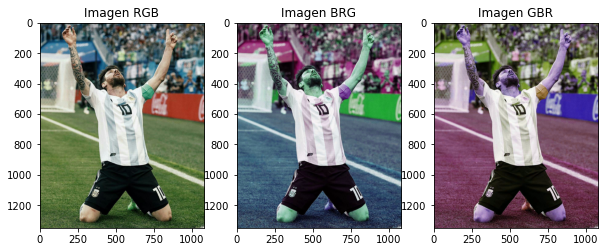

In [4]:
O = np.array([[0,0,1],[1,0,0],[0,1,0]]) #Matriz BRG
H = np.array([[0,1,0],[0,0,1],[1,0,0]]) #Matriz GBR

#Graficos
fig, axes = plt.subplots(1,3,figsize=(10,5))
axes[0].set_title('Imagen RGB')
axes[0].imshow(img_rgb)
img_brg = apply_matrix(img_rgb, O)
axes[1].set_title('Imagen BRG')
axes[1].imshow(img_brg)
img_gbr = apply_matrix(img_rgb, H)
axes[2].set_title('Imagen GBR')
axes[2].imshow(img_gbr)

### EJERCICIO 3

Text(0.5, 1.0, 'Imagen RGB recuperada\n a partir de la YIQ')

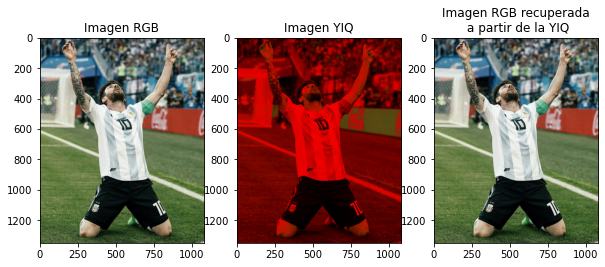

In [5]:
#Matrices de transformación entre RGB e YIQ
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

rgb_yiq = apply_matrix(img_rgb, M_YIQ)
yiq_rgb = apply_matrix(rgb_yiq, M_RGB)
#Graficos
fig, axes = plt.subplots(1,3,figsize=(10,5))
axes[0].imshow(np.clip(img_rgb, 0, 1))
axes[0].set_title('Imagen RGB')
axes[1].imshow(np.clip(rgb_yiq, 0, 1))
axes[1].set_title('Imagen YIQ')
axes[2].imshow(np.clip(yiq_rgb, 0, 1))
axes[2].set_title('Imagen RGB recuperada\n a partir de la YIQ')


Text(0.5, 1.0, 'Capa Q modificada')

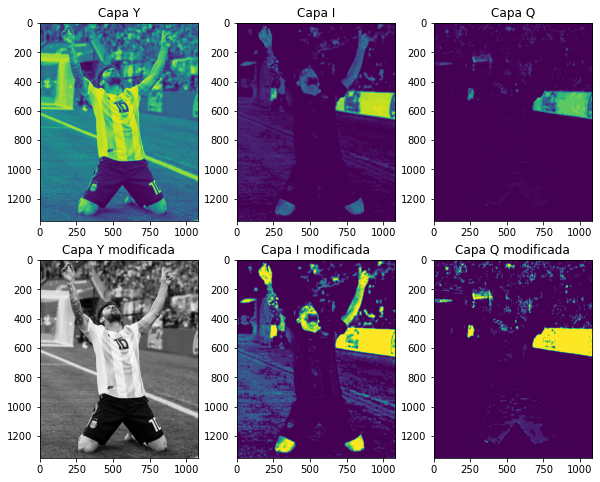

In [6]:
#Cada canal
y_channel = rgb_yiq[:,:,0] 
i_channel = rgb_yiq[:,:,1] 
q_channel = rgb_yiq[:,:,2] 
#Graficos
fig, axes = plt.subplots(2,3,figsize=(10,8))
axes[0,0].imshow(np.clip(y_channel, 0, 1))
axes[0,0].set_title('Capa Y')
axes[0,1].imshow(np.clip(i_channel, 0, 1))
axes[0,1].set_title('Capa I')
axes[0,2].imshow(np.clip(q_channel, 0, 1))
axes[0,2].set_title('Capa Q')
axes[1,0].imshow(np.clip(y_channel, 0, 1),'gray')
axes[1,0].set_title('Capa Y modificada')
axes[1,1].imshow(np.clip(i_channel*10, 0, 1))
axes[1,1].set_title('Capa I modificada')
axes[1,2].imshow(np.clip(q_channel*50, 0, 1))
axes[1,2].set_title('Capa Q modificada')